In [1]:
import gym
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
env = gym.make('FrozenLake-v0')

[2017-07-28 14:46:27,750] Making new env: FrozenLake-v0


In [6]:
input_size = env.observation_space.n
output_size = env.action_space.n
learning_rate = 0.1

In [8]:
X = tf.placeholder(shape=[1, input_size], dtype=tf.float32)
W = tf.Variable(tf.random_uniform([input_size, output_size], 0, 0.01))
Qpred = tf.matmul(X, W)
Y = tf.placeholder(shape=[1, output_size], dtype=tf.float32)

In [9]:
loss = tf.reduce_sum(tf.square(Y - Qpred))

In [10]:
train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)

In [11]:
dis = .99
num_episodes = 2000
rList = []

In [12]:
init = tf.global_variables_initializer()

In [13]:
def one_hot(x):
    return np.identity(16)[x:x+1]

percent of successful episodes:0.472%


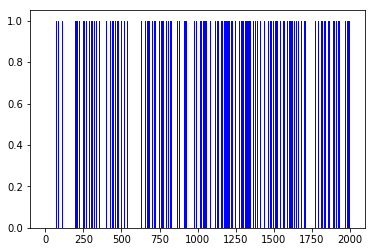

In [16]:
with tf.Session() as sess:
    sess.run(init)
    for i in range(num_episodes):
        s = env.reset()
        e = 1. / ((i / 50) + 10)
        rAll = 0
        done = False
        local_loss = []
        
        while not done:
            Qs = sess.run(Qpred, feed_dict={X: one_hot(s)})
            if np.random.rand(1) < e:
                a = env.action_space.sample()
            else:
                a = np.argmax(Qs)
            
            s1, reward, done, _ = env.step(a)
            if done:
                Qs[0, a] = reward
            else:
                Qs1 = sess.run(Qpred, feed_dict={X: one_hot(s1)})
                Qs[0, a] = reward + dis * np.max(Qs1)
            sess.run(train, feed_dict={X: one_hot(s), Y: Qs})
            rAll += reward
            s = s1
        rList.append(rAll)
    print ("percent of successful episodes:" + str(sum(rList)/num_episodes) + "%")
    plt.bar(range(len(rList)), rList, color="blue")
    plt.show()